In [43]:
import pandas as pd

messages = pd.read_csv('G:/OpenCV_Course/python_env/NLP_projs/SMSSpamCollection', sep='\t', names=["label","text"], encoding='ISO-8859-1')

print(messages)


     label                                               text
0      ham  Go until jurong point, crazy.. Available only ...
1      ham                      Ok lar... Joking wif u oni...
2     spam  Free entry in 2 a wkly comp to win FA Cup fina...
3      ham  U dun say so early hor... U c already then say...
4      ham  Nah I don't think he goes to usf, he lives aro...
...    ...                                                ...
5567  spam  This is the 2nd time we have tried 2 contact u...
5568   ham              Will Ã¼ b going to esplanade fr home?
5569   ham  Pity, * was in mood for that. So...any other s...
5570   ham  The guy did some bitching but I acted like i'd...
5571   ham                         Rofl. Its true to its name

[5572 rows x 2 columns]


In [ ]:
import re
import nltk

from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
lemmatizer = WordNetLemmatizer()
new_messages=[]

for i in range(len(messages)):
    message =str(messages['text'][i])
    review = re.sub('[^a-zA-Z]',' ', message )
    review = review.lower()
    review = review.split()
    review = [lemmatizer.lemmatize(word) for word in review if not word in set(stopwords.words('english'))]
    review =' '.join(review)
    new_messages.append(review)

print(new_messages)

In [31]:
# from sklearn.feature_extraction.text import CountVectorizer
# cv= CountVectorizer(max_features=5000)
# X=cv.fit_transform(new_messages).toarray()
from sklearn.feature_extraction.text import TfidfVectorizer
tf=TfidfVectorizer()
X = tf.fit_transform(new_messages).toarray()


y = pd.get_dummies(messages['label'])
y = y.iloc[:,1].values
print(X)
print(y)

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
[False False  True ... False False False]


In [32]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 0)

In [33]:
from sklearn.naive_bayes import MultinomialNB

spam_detect_model = MultinomialNB().fit(X_train, y_train)

y_pred=spam_detect_model.predict(X_test)

In [35]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report
# Calculating metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

# Confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Classification report (includes precision, recall, f1 for each class)
class_report = classification_report(y_test, y_pred)

# Printing results
print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1-Score: {f1}")
print("Confusion Matrix:")
print(conf_matrix)
print("\nClassification Report:")
print(class_report)

Accuracy: 0.9721973094170404
Precision: 0.9730714305205614
Recall: 0.9721973094170404
F1-Score: 0.9709281821076642
Confusion Matrix:
[[955   0]
 [ 31 129]]

Classification Report:
              precision    recall  f1-score   support

       False       0.97      1.00      0.98       955
        True       1.00      0.81      0.89       160

    accuracy                           0.97      1115
   macro avg       0.98      0.90      0.94      1115
weighted avg       0.97      0.97      0.97      1115



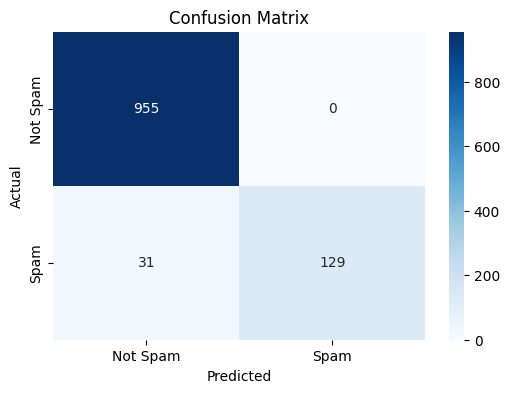

In [36]:
import seaborn as sns
import matplotlib.pyplot as plt

# Visualize confusion matrix with heatmap
plt.figure(figsize=(6,4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Not Spam', 'Spam'], yticklabels=['Not Spam', 'Spam'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


In [37]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report

# Assuming X and y are your feature matrix and labels
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=0)

# Training model using Logistic Regression
logistic_model = LogisticRegression().fit(X_train, y_train)

# Predicting on the test set
y_pred = logistic_model.predict(X_test)

# Calculating metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

# Confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Classification report
class_report = classification_report(y_test, y_pred)

# Printing results
print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1-Score: {f1}")
print("Confusion Matrix:")
print(conf_matrix)
print("\nClassification Report:")
print(class_report)


Accuracy: 0.9632286995515695
Precision: 0.963993731910775
Recall: 0.9632286995515695
F1-Score: 0.9611743154161424
Confusion Matrix:
[[953   2]
 [ 39 121]]

Classification Report:
              precision    recall  f1-score   support

       False       0.96      1.00      0.98       955
        True       0.98      0.76      0.86       160

    accuracy                           0.96      1115
   macro avg       0.97      0.88      0.92      1115
weighted avg       0.96      0.96      0.96      1115



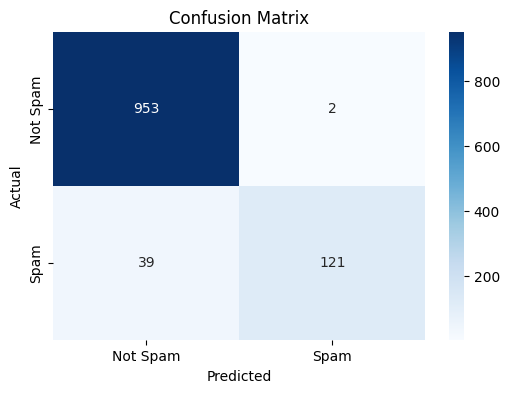

In [38]:
import seaborn as sns
import matplotlib.pyplot as plt

# Visualize confusion matrix with heatmap
plt.figure(figsize=(6,4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Not Spam', 'Spam'], yticklabels=['Not Spam', 'Spam'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [39]:
from sklearn.svm import SVC

# Training model using Support Vector Classifier (SVC)
svm_model = SVC(kernel='linear').fit(X_train, y_train)

# Predicting on the test set
y_pred = svm_model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

# Confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Classification report
class_report = classification_report(y_test, y_pred)

# Printing results
print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1-Score: {f1}")
print("Confusion Matrix:")
print(conf_matrix)
print("\nClassification Report:")
print(class_report)



Accuracy: 0.9838565022421525
Precision: 0.9840080829352672
Recall: 0.9838565022421525
F1-Score: 0.9834987283808196
Confusion Matrix:
[[954   1]
 [ 17 143]]

Classification Report:
              precision    recall  f1-score   support

       False       0.98      1.00      0.99       955
        True       0.99      0.89      0.94       160

    accuracy                           0.98      1115
   macro avg       0.99      0.95      0.97      1115
weighted avg       0.98      0.98      0.98      1115



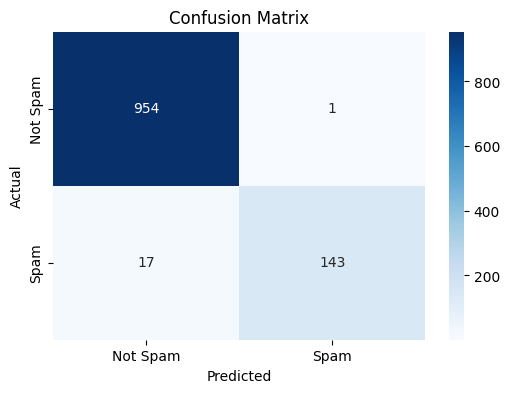

In [40]:
import seaborn as sns
import matplotlib.pyplot as plt

# Visualize confusion matrix with heatmap
plt.figure(figsize=(6,4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Not Spam', 'Spam'], yticklabels=['Not Spam', 'Spam'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [41]:
from sklearn.ensemble import RandomForestClassifier

# Training model using Random Forest
rf_model = RandomForestClassifier(n_estimators=100, random_state=0).fit(X_train, y_train)

# Predicting on the test set
y_pred = rf_model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

# Confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Classification report
class_report = classification_report(y_test, y_pred)

# Printing results
print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1-Score: {f1}")
print("Confusion Matrix:")
print(conf_matrix)
print("\nClassification Report:")
print(class_report)


Accuracy: 0.9838565022421525
Precision: 0.984155148654939
Recall: 0.9838565022421525
F1-Score: 0.9834507632782118
Confusion Matrix:
[[955   0]
 [ 18 142]]

Classification Report:
              precision    recall  f1-score   support

       False       0.98      1.00      0.99       955
        True       1.00      0.89      0.94       160

    accuracy                           0.98      1115
   macro avg       0.99      0.94      0.97      1115
weighted avg       0.98      0.98      0.98      1115



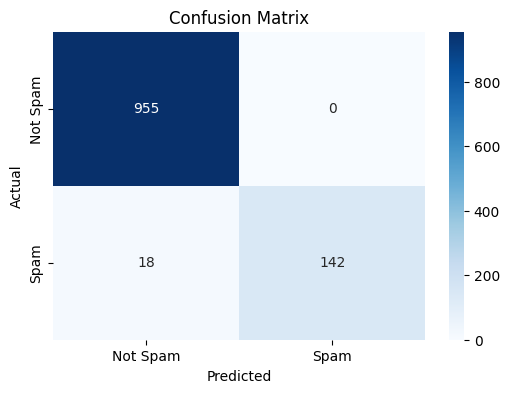

In [42]:
import seaborn as sns
import matplotlib.pyplot as plt

# Visualize confusion matrix with heatmap
plt.figure(figsize=(6,4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Not Spam', 'Spam'], yticklabels=['Not Spam', 'Spam'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()